
Model Accuracies:
Decision Tree : 0.69
Logistic      : 0.82
KNN           : 0.84
Random Forest : 0.85


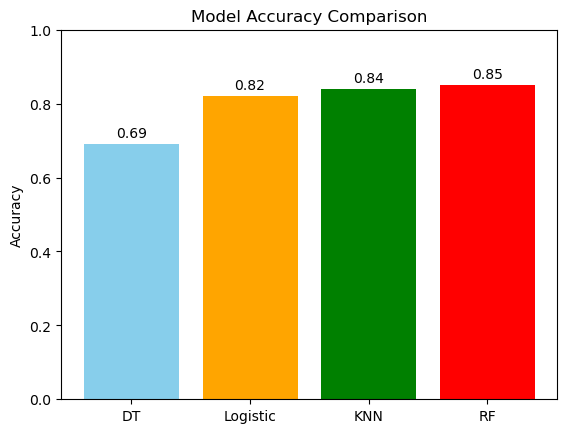

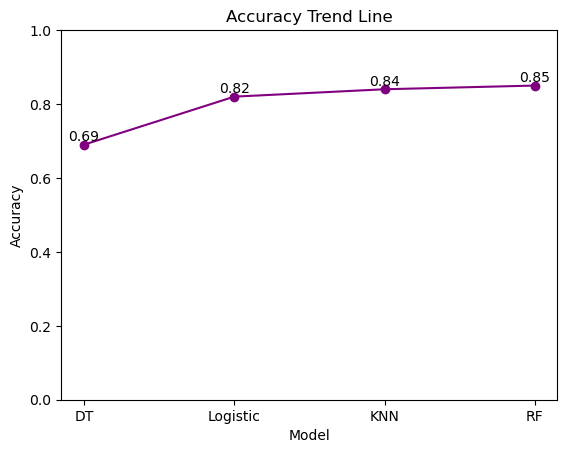

C:\Users\kunal\AppData\Local\Temp\ipykernel_14740\3772858704.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


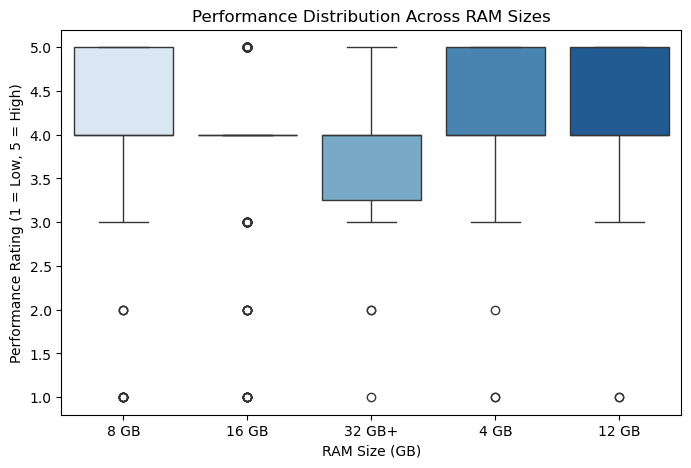

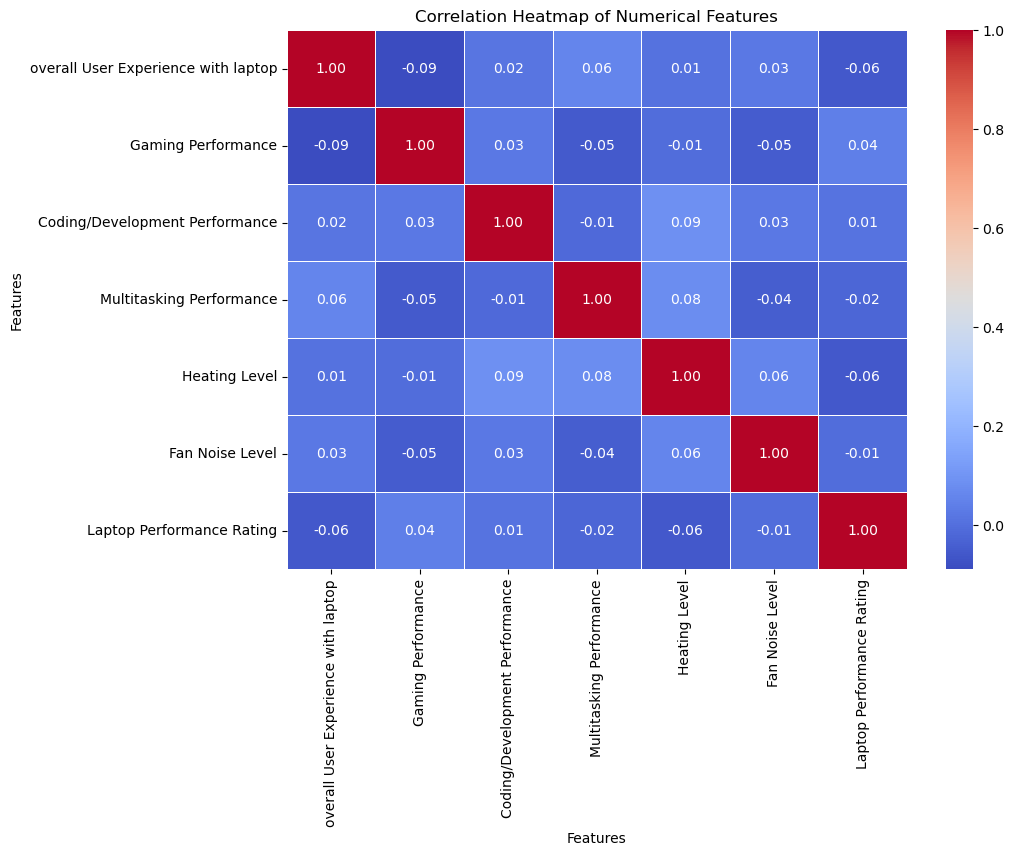

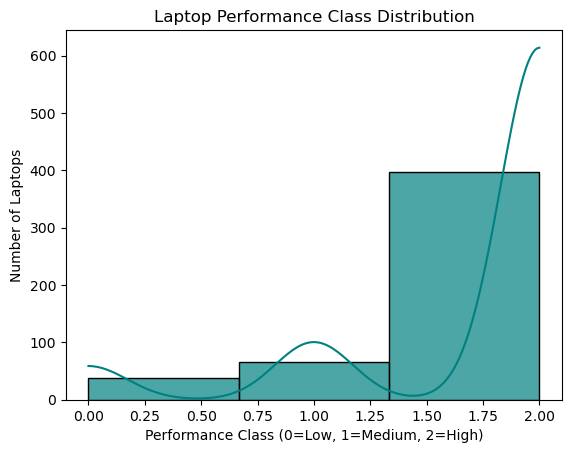

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


df = pd.read_excel(
    r"C:\Users\kunal\Downloads\Laptop_Performance_Synthetic_500.xlsx"
)

if "Timestamp" in df.columns:
    df.drop(columns=["Timestamp"], inplace=True)


target_col = "Laptop Performance Rating"

y = df[target_col].apply(
    lambda x: 0 if x <= 2 else (1 if x == 3 else 2)
)

X = df.drop(columns=[target_col])


cat_cols = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(max_depth=12, random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
dt_acc = accuracy_score(y_test, dt_pred)

log = LogisticRegression(max_iter=3000)
log.fit(X_train_scaled, y_train)
log_pred = log.predict(X_test_scaled)
log_acc = accuracy_score(y_test, log_pred)

knn = KNeighborsClassifier(n_neighbors=7, weights="distance")
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred)

rf = RandomForestClassifier(
    n_estimators=600,
    max_depth=16,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42
)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)


print("\nModel Accuracies:")
print("Decision Tree :", round(dt_acc, 4))
print("Logistic      :", round(log_acc, 4))
print("KNN           :", round(knn_acc, 4))
print("Random Forest :", round(rf_acc, 4))

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure()
bars = plt.bar(
    ["DT", "Logistic", "KNN", "RF"],
    [dt_acc, log_acc, knn_acc, rf_acc],
    color=["skyblue", "orange", "green", "red"]
)

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.01,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )

plt.show()



models = ["DT", "Logistic", "KNN", "RF"]
accuracies = [dt_acc, log_acc, knn_acc, rf_acc]

plt.figure()
plt.plot(models, accuracies, marker="o", color="purple")

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha="center")

plt.title("Accuracy Trend Line")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()



plt.figure(figsize=(8, 5))
sns.boxplot(
    x=df["RAM Size"],
    y=df["Laptop Performance Rating"],
    palette="Blues"
)

plt.xlabel("RAM Size (GB)")
plt.ylabel("Performance Rating (1 = Low, 5 = High)")
plt.title("Performance Distribution Across RAM Sizes")
plt.show()



numeric_df = df.select_dtypes(include=["int64", "float64"])
corr = numeric_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(
    corr,
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,         
    fmt=".2f"
)

plt.title("Correlation Heatmap of Numerical Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()



plt.figure()
sns.histplot(
    y,
    bins=3,
    color="teal",
    alpha=0.7,
    edgecolor="black",
    kde=True            
)

plt.title("Laptop Performance Class Distribution")
plt.xlabel("Performance Class (0=Low, 1=Medium, 2=High)")
plt.ylabel("Number of Laptops")
plt.show()
